28 out of 28 is correct


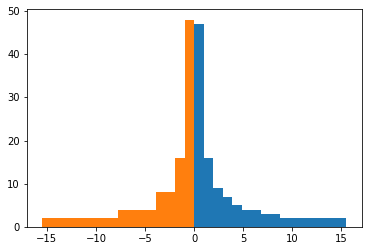

In [17]:
# -*- coding: utf-8 -*-
# CSE 330 Numerical Analysis
# Lab 2 (Week 3)
# Prepared by Tahmid Rafi (RAF), Lecturer, Department of CSE
# BRAC University

import math
import itertools
import matplotlib.pyplot as plt

class Float8():
    '''
    This class implements a 8 bit Floating point number system.
    Where First bit is a sign bit, next three bits are exponents
    and the rest 4 bits are mantissa (significand).
    
    numbers are divided into two categories, normals and subnormals.
    
    for normals the encoding is:    (-1)^sign * 2^(e-3) * 1.fraction
    for subnormals the encoding is: (-1)^sign * 2^(1-3) * 0.fraction
    
    example:
        0 001 0000 = + 2^(1-3) * 1.0  = +0.25
        0 010 0000 = + 2^(2-3) * 1.0  = +0.5
        0 011 0000 = + 2^(3-3) * 1.0  = +1.0
        0 011 0100 = + 2^(3-3) * 1.25 = +1.25
    
    if exponent is 0 then the number is considered subnormal.
    example,
        0 000 0000 = + 2^-2 * 0    = +0.0
        0 000 1000 = + 2^-2 * 0.5  = +0.125
        0 000 1100 = + 2^-2 * 0.75 = +0.1875
        
    if exponent is 7 (all 1's) then and mantissa is zero then the number
    is considered infinity (inf), otherwise it is not-a-number (nan).
    example
        0 111 0000 = +inf
        1 111 0000 = -inf
        X 111 XXXX = nan
    '''
    
    def __init__(self, bitstring):
        '''Constructor
        takes a 8-bit string of 0's and 1's as input and stores the sub-strings
        accordingly.
        Usage: Float8('00011110')
        '''
        
        # Make sure the input consists of exactly 8-bits.
        assert(len(bitstring)==8)
        
        # Assign the sign bit
        self.sign = bitstring[0]
        #self.sign = '0'

        # Assign the exponent part
        self.exponent = bitstring[1:4]
        #self.exponent = '000'

        # Assign the mantissa
        self.mantissa = bitstring[4:]
        #self.mantissa = '0000'

        self.val = self.calculate_value()
        
    def __str__(self):
        return f'Sign bit value: {self.sign}\n' + \
            f'Exponent value: {self.exponent}\n' + \
            f'Mantissa value: {self.mantissa}\n' + \
            f'Floating value: {self.val}\n'
    
    def tobitstring(self):
        return self.sign + self.exponent + self.mantissa
    
    def toformattedstring(self):
        return ' '.join([self.sign, self.exponent, self.mantissa])
    
    def calculate_value(self):
        '''Calculate the value of the number from bits'''
       # Initialize with zero
        val = 0.0
        
        # Handle the case of inf and nan
        # use math.inf to represent infinity
        # use math.nan to represent not-a-number
        
        if self.exponent =='111':
           if self.mantissa=='0000':
              if self.sign=='1':
                return -math.inf
              elif self.sign=='0':
                  return math.inf
           else :
              return math.nan              

        #    Write you code here
        #    un-comment the block when you are done.
        #

        # Handle the case of subnormals

        elif self.exponent == '000':
             val = 0.0
        #    Write you code here.
        #    you can use a for loop to calculate the value.
        #    it should look like this.
             for exp, bit in enumerate(self.mantissa,0):
                 #temp=
                 val +=(int (bit)*math.pow(2,-(exp+1)))
             val *=math.pow(2,-2) 
        
        # Handle the case of normals

        else:
            val = 1.0
            ex = 0
        #    use a loop like this to calculate mantissa value
            for exp, bit in enumerate(self.mantissa,0):
               #temp=
               val += int(bit)*math.pow(2,-(exp+1))
        #    
        #    use a loop like this to calculate exponent value
            for e, bit in enumerate(reversed(self.exponent),1):
                #temp=
                if bit == '1':
                   ex += math.pow(2,e-1)
        #    
        #    calculate final value
            val *=math.pow(2,ex-3) 

        # Handle the sign bit

        if self.sign == '0':
            val *=math.pow(-1,0)
        else :   
            val *=math.pow(-1,1)
        return val


class Float16():
    '''
    This class implements a 16 bit Floating point number system.
    Where First bit is a sign bit, next four bits are exponents
    and the rest 11 bits are mantissa (significand).
    
    numbers are divided into two categories, normals and subnormals.
    
    for normals the encoding is:    (-1)^sign * 2^(e-7) * 1.fraction
    for subnormals the encoding is: (-1)^sign * 2^(1-7) * 0.fraction
    
    example:
        0 0101 00000000000 = + 2^(5-7) * 1.0  = +0.25
        0 0110 00000000000 = + 2^(6-7) * 1.0  = +0.5
        0 0111 00000000000 = + 2^(3-7) * 1.0  = +1.0
        0 0111 01000000000 = + 2^(3-7) * 1.25 = +1.25
    
    if exponent is 0 then the number is considered subnormal.
    example,
        0 0000 00000000000 = + 2^-6 * 0    = +0.0
        0 0000 10000000000 = + 2^-6 * 0.5  = +0.0078125
        0 0000 11000000000 = + 2^-6 * 0.75 = +0.01171875
        
    if exponent is 15 (all 1's) then and mantissa is zero then the number
    is considered infinity (inf), otherwise it is not-a-number (nan).
    example
        0 1111 00000000000 = +inf
        1 1111 00000000000 = -inf
        X 1111 XXXXXXXXXXX = nan
    '''

    def __init__(self, bitstring):
        '''Constructor
        takes a 16-bit string of 0's and 1's as input and stores the sub-strings
        accordingly.
        Usage: Float16('0001111000011110')
        '''

        # Make sure the input consists of exactly 16-bits.
        assert(len(bitstring)==16)

        # Assign the sign bit
        self.sign = bitstring[0]
        #self.sign = '0'

        # Assign the exponent part
        self.exponent = bitstring[1:5]
        #self.exponent = '0000'

        # Assign the mantissa
        self.mantissa = bitstring[5:]
        #self.mantissa = '00000000000'

        self.val = self.calculate_value()
        
    def __str__(self):
        return f'Sign bit value: {self.sign}\n' + \
            f'Exponent value: {self.exponent}\n' + \
            f'Mantissa value: {self.mantissa}\n' + \
            f'Floating value: {self.val}\n'
    
    def tobitstring(self):
        return self.sign + self.exponent + self.mantissa
    
    def toformattedstring(self):
        return ' '.join([self.sign, self.exponent, self.mantissa])
    
    def calculate_value(self):
        '''Calculate the value of the number from bits'''

        # Initialize with zero
        val = 0.0
        #ex = 0
        # Handle the case of inf and nan
        # use math.inf to represent infinity
        # use math.nan to represent not-a-number

        if self.exponent == '1111':
           if self.mantissa=='00000000000':
              if self.sign=='1':
                 val=-math.inf
              elif self.sign=='0':
                  val=math.inf
              return val 
           else :
               return math.nan   
        #    Write you code here
        #    un-comment the block when you are done.
        #

        # Handle the case of subnormals

        elif self.exponent == '0000':
             val = 0.0
        #    Write you code here.
        #    you can use a for loop to calculate the value.
        #    it should look like this.
             for exp, bit in enumerate(self.mantissa,0):
                 #print(bit+ "self.matissa")
                 val +=int (bit)*math.pow(2,-(exp+1))
             val *=math.pow(2,-6) 

        # Handle the case of normals

        else:
             val = 1.0
             ex = 0
        #    use a loop like this to calculate mantissa value
             for exp, bit in enumerate(self.mantissa,0):
                val += (int (bit)*math.pow(2,-(exp+1)))
        #    
        #    use a loop like this to calculate exponent value
             for e, bit in enumerate(reversed(self.exponent),1):
                 if bit == '1':
                    ex += math.pow(2,e-1)
        #    
        #    calculate final value
             val *=math.pow(2,ex-7) 

        # Handle the sign bit

        if self.sign == '0':
            val *=math.pow(-1,0)
        else :   
            val *=math.pow(-1,1)
        return val

def test_8bit():
    count = 0
    data = [ '00000000', '00000001', '00001001', '00010000',
             '00010001', '00011000', '00011011', '00100000',
             '00101101', '00110000', '00110101', '01000011',
             '01000000', '01010000', '01011100', '01100000',
             '01110111', '01110000', '10000000', '10000001',
             '11110001', '11110000', '10110001', '10111101',
             '11100000', '11101011', '11010000', '11000000']
    result = ['(0, 1)', '(1, 64)', '(9, 64)', '(1, 4)', '(17, 64)', '(3, 8)', '(27, 64)',
              '(1, 2)', '(29, 32)', '(1, 1)', '(21, 16)', '(19, 8)', '(2, 1)', '(4, 1)',
              '(7, 1)', '(8, 1)', 'nan', 'inf', '(0, 1)', '(-1, 64)', 'nan', '-inf',
              '(-17, 16)', '(-29, 16)', '(-8, 1)', '(-27, 2)', '(-4, 1)', '(-2, 1)']
    
    test = [Float8(x).val for x in data]
    for index in range(len(test)):
        d = test[index]
        try:
            test[index] = str(d.as_integer_ratio())
        except Exception:
            test[index] = str(d)
        if test[index] == result[index]:
            count += 1
        else:
            print(data[index], result[index], test[index])
    print(count, 'out of 28 is correct')
    
def test_16bit():
    count = 0
    data = [ '0011100000000010', '0100000000000000', '1100000000000000', '0100010000000000',
             '1100010000000000', '0100100000000000', '1100100000000000', '0100101000000000',
             '1100101000000000', '0100110000000000', '1100110000000000', '0101101110000000',
             '0010010000000000', '0000000000000001', '0000011111111111', '0000100000000000',
             '0111011111111111', '0000000000000000', '1000000000000000', '0111100000000000',
             '1111100000000000', '0111100000000001', '0111110000000001', '0111111111111111',
             '0010101010101011', '0100010010010001', '0011100000000000', '0011100000000001']
    result = ['(1025, 1024)', '(2, 1)', '(-2, 1)', '(3, 1)', '(-3, 1)', '(4, 1)', '(-4, 1)',
               '(5, 1)', '(-5, 1)', '(6, 1)', '(-6, 1)', '(23, 1)', '(3, 16)', '(1, 131072)',
               '(2047, 131072)', '(1, 64)', '(4095, 16)', '(0, 1)', '(0, 1)', 'inf', '-inf',
               'nan', 'nan', 'nan', '(2731, 8192)', '(3217, 1024)', '(1, 1)', '(2049, 2048)']
    
    test = [Float16(x).val for x in data]
    for index in range(len(test)):
        d = test[index]
        try:
            test[index] = str(d.as_integer_ratio())
        except Exception:
            test[index] = str(d)
        if test[index] == result[index]:
            count += 1
        else:
            print(data[index], result[index], test[index])
    print(count, 'out of 28 is correct')

def histogram_8bit():
    combinations = itertools.product('01', repeat=8)
    bitstrings = [''.join(x) for x in combinations]
    numbers = list(map(Float8, bitstrings))
    values = [x.val for x in numbers]
    positive = values[0:112]
    negative = values[128:240]
    plt.hist(positive, 16)
    plt.hist(negative, 16)

def histogram_16bit():
    combinations = itertools.product('01', repeat=16)
    bitstrings = [''.join(x) for x in combinations]
    numbers = list(map(Float16, bitstrings))
    values = [x.val for x in numbers]
    positive = values[0:30720]
    negative = values[32768:63488]
    plt.hist(positive, 64)
    plt.hist(negative, 64)
    

